In [59]:
import numpy as np

In [60]:
import matplotlib.pyplot as plt

In [61]:
import sklearn
import sklearn.datasets
from dnn_app_utils_v3 import *
from dnn_utils_v2 import sigmoid_backward, relu_backward, sigmoid, relu
from testCases_v4 import *
np.random.seed(1)

In [62]:
plt.rcParams['figure.figsize'] = (5.0,4.0)

In [63]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap']='gray'

In [64]:
def initializeParameters(layer_dims):
    parameters={}
    L=len(layer_dims)-1
    np.random.seed(3)
    for l in range(1,L+1):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
    return parameters

In [65]:
parameters = initializeParameters([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.46040903  0.3564088   0.07878985]
 [-1.52153542 -0.22648652 -0.28965949]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.08274148 -0.62700068]]
b2 = [[ 0.]]


In [66]:
def linear_forward(A,W,b):
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A,W,b)
    return Z,cache

In [67]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [68]:
def linear_activation_forward(A_prev,W,b,activation):
    if activation=="sigmoid":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    elif activation=="relu":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache=(linear_cache,activation_cache)
    return A, cache

In [69]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))


With sigmoid: A = [[ 0.96890023  0.11013289]]
With ReLU: A = [[ 3.43896131  0.        ]]


In [70]:
def L_model_forward(X,parameters):
    caches=[]
    A=X
    L=len(parameters)//2
    for l in range(1,L):
        A_prev=A
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)], activation='relu')
        caches.append(cache)
        
    AL,cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],activation='sigmoid')
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [71]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]
Length of caches list = 3


In [72]:
def compute_cost(AL,Y):
    m=Y.shape[1]
    cost = (-1/m)*(np.sum(np.multiply(1-Y,np.log(1-AL)) + np.multiply(Y,np.log(AL))))
    cost = np.squeeze(cost)
    assert(cost.shape==())
    return cost

In [73]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615


In [74]:
def linear_backward(dZ, cache):
    A_prev,W,b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

In [75]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[ 0.50629448]]


In [76]:
def linear_activation_backwards(dA,cache,activation):
    linear_cache,activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
    elif activation =="sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
    
    return dA_prev,dW,db

In [77]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backwards(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backwards(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [78]:
def L_model_backward(AL,Y,caches):
    grads={}
    L=len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[-1]
    grads["dA"+str(L-1)], grads["dW"+str(L)],grads["db"+str(L)] = linear_activation_backwards(dAL,current_cache,activation='sigmoid')
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        grads["dA"+str(l)], grads["dW"+str(l+1)],grads["db"+str(l+1)] = linear_activation_backwards(grads["dA"+str(l+1)],current_cache,activation='relu')
        
    return grads

In [79]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [80]:
def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    for l in range(L):
        parameters["W"+str(l+1)]=parameters["W"+str(l+1)]-learning_rate*grads["dW"+str(l+1)]
        parameters["b"+str(l+1)]=parameters["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
    return parameters

In [81]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [82]:
X = sklearn.datasets.load_iris().data[0:36][:]
X = np.concatenate((X,sklearn.datasets.load_iris().data[50:86][:]),axis=0)
X = X.reshape(4,72)
X = sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=False, return_norm=False)
X_test = sklearn.datasets.load_iris().data[36:50][:]
X_test = np.concatenate((X_test,sklearn.datasets.load_iris().data[86:100][:]),axis=0)
X_test = X_test.reshape(4,28)

In [83]:
Y = sklearn.datasets.load_iris().target[0:36][:]
Y = np.concatenate((Y,sklearn.datasets.load_iris().target[50:86][:]),axis=0)
Y = Y.reshape(1,72)
Y_test = sklearn.datasets.load_iris().target[36:50][:]
Y_test = np.concatenate((Y_test,sklearn.datasets.load_iris().target[86:100][:]),axis=0)
Y_test = Y_test.reshape(1,28)


X = Examples_shuffled[0:4][:]
Y = (Examples_shuffled[4][:]).reshape(108,1)

In [84]:
layer_dims = [4,20,5,1]

In [85]:
def L_layer_model(X,Y,layer_dims,learning_rate=0.0075,num_iteration=3000,print_cost=True):
    costs=[]
    parameters = initializeParameters(layer_dims)
    for i in range(0,num_iteration):
        AL,caches = L_model_forward(X,parameters)
        cost = compute_cost(AL,Y)
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.692622
Cost after iteration 100: 0.692425
Cost after iteration 200: 0.692386
Cost after iteration 300: 0.692362
Cost after iteration 400: 0.692346
Cost after iteration 500: 0.692334
Cost after iteration 600: 0.692324
Cost after iteration 700: 0.692317
Cost after iteration 800: 0.692310
Cost after iteration 900: 0.692305
Cost after iteration 1000: 0.692297
Cost after iteration 1100: 0.692292
Cost after iteration 1200: 0.692286
Cost after iteration 1300: 0.692281
Cost after iteration 1400: 0.692276
Cost after iteration 1500: 0.692271
Cost after iteration 1600: 0.692266
Cost after iteration 1700: 0.692261
Cost after iteration 1800: 0.692256
Cost after iteration 1900: 0.692250
Cost after iteration 2000: 0.692245
Cost after iteration 2100: 0.692239
Cost after iteration 2200: 0.692233
Cost after iteration 2300: 0.692228
Cost after iteration 2400: 0.692222
Cost after iteration 2500: 0.692217
Cost after iteration 2600: 0.692211
Cost after iteration 2700: 0.692206
Cost

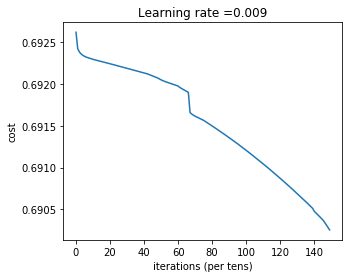

In [86]:
parameters = L_layer_model(X,Y,layer_dims,learning_rate=0.009,num_iteration=15000,print_cost=True)

In [87]:
predictions_train = predict(X, Y, parameters)
print(predictions_train)

Accuracy: 0.638888888889
[[ 0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.
   0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.
   1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.
   0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.]]


In [88]:
pred_test = predict(X_test, Y_test, parameters)
print(pred_test)

Accuracy: 0.464285714286
[[ 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
